# Project 2- Wine Quality Prediction

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [6]:
# Load the dataset
wine_quality_file_path="Csv file/WineQT.csv"
wine_quality_data = pd.read_csv(wine_quality_file_path)

print("Shape:", wine_quality_data.shape)
wine_quality_data.head()

Shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
print(wine_quality_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [9]:
# DROP UNUSED COLUMNS
wine_quality_data = wine_quality_data.drop(columns=["Id"])

print("\nColumns after dropping Id:")
print(wine_quality_data.columns)


Columns after dropping Id:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [11]:
# CHECK MISSING VALUES
print("\nMissing values:")
print(wine_quality_data.isnull().sum())


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


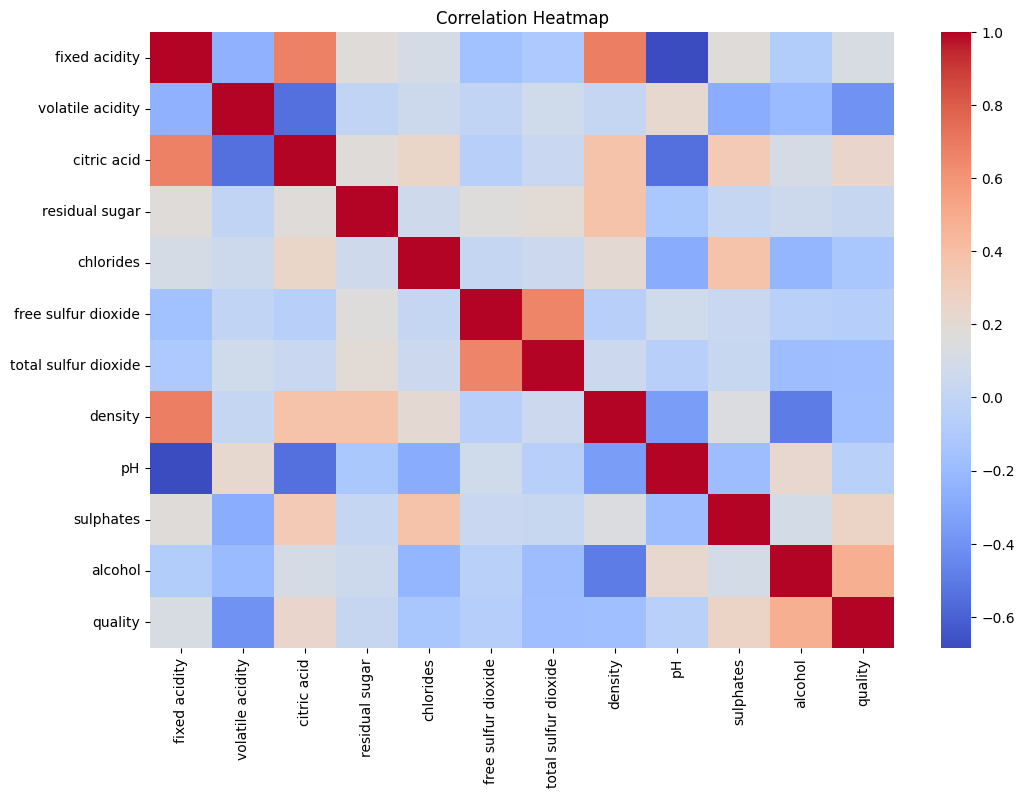

In [12]:
#  EDA - CORRELATION HEATMAP

plt.figure(figsize=(12,8))
sns.heatmap(wine_quality_data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\os\AppData\Local\Temp\ipykernel_8844\2835107155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=wine_quality_data["quality"], palette="viridis")


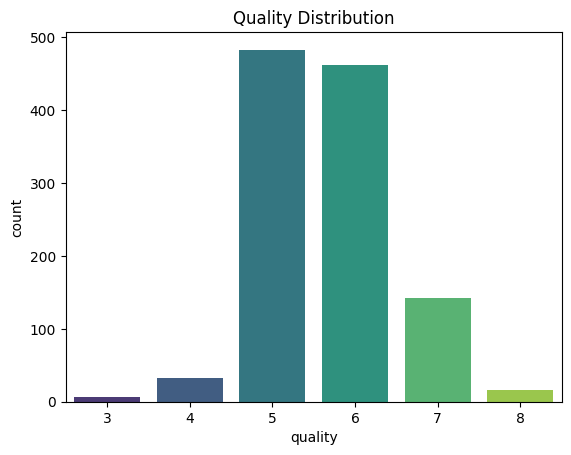

In [13]:
# Wine quality distribution
sns.countplot(x=wine_quality_data["quality"], palette="viridis")
plt.title("Quality Distribution")
plt.show()

In [16]:
# FEATURES & TARGET
X = wine_quality_data.drop("quality", axis=1)
y = wine_quality_data["quality"]

# TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# MODEL 1 — RANDOM FOREST
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("\nRANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


RANDOM FOREST RESULTS
Accuracy: 0.7161572052401747
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.86      0.79        97
           6       0.69      0.73      0.71        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229



C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

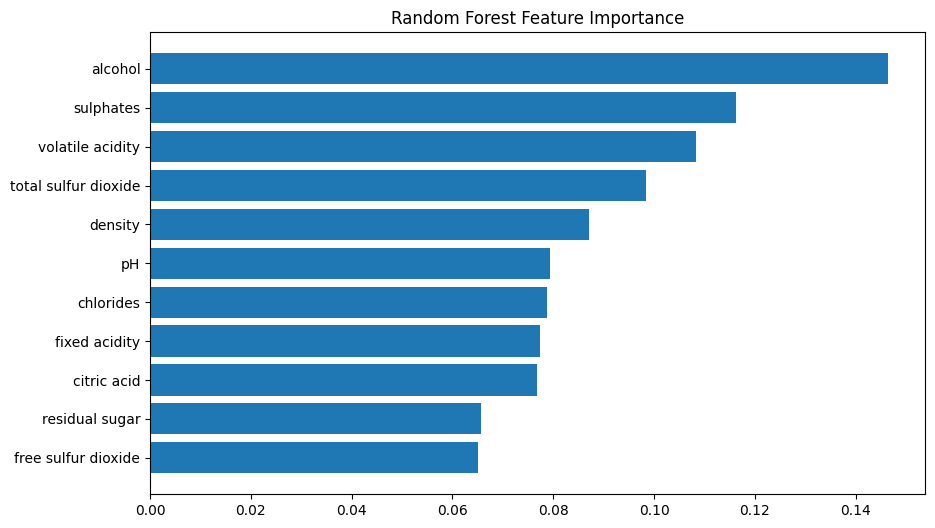

In [25]:
# FEATURE IMPORTANCE
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(X.columns[indices], importances[indices])
plt.title("Random Forest Feature Importance")
plt.show()

In [26]:
# MODEL 2 — SGD CLASSIFIER
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)

sgd_pred = sgd.predict(X_test_scaled)
print("\nSGD CLASSIFIER RESULTS")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))



SGD CLASSIFIER RESULTS
Accuracy: 0.5764192139737991
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.67      0.69        97
           6       0.51      0.68      0.58        92
           7       0.36      0.14      0.20        29
           8       0.00      0.00      0.00         3

    accuracy                           0.58       229
   macro avg       0.26      0.25      0.25       229
weighted avg       0.55      0.58      0.55       229



C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [28]:
# MODEL 3 — Support Vector Classifier
svc = SVC(kernel="rbf", C=3)
svc.fit(X_train_scaled, y_train)

svc_pred = svc.predict(X_test_scaled)
print("\nSVC RESULTS")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


SVC RESULTS
Accuracy: 0.6637554585152838
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.77      0.74        97
           6       0.62      0.71      0.66        92
           7       0.63      0.41      0.50        29
           8       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.33      0.32      0.32       229
weighted avg       0.63      0.66      0.64       229



C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\os\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

C:\Users\os\AppData\Local\Temp\ipykernel_8844\2008855071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


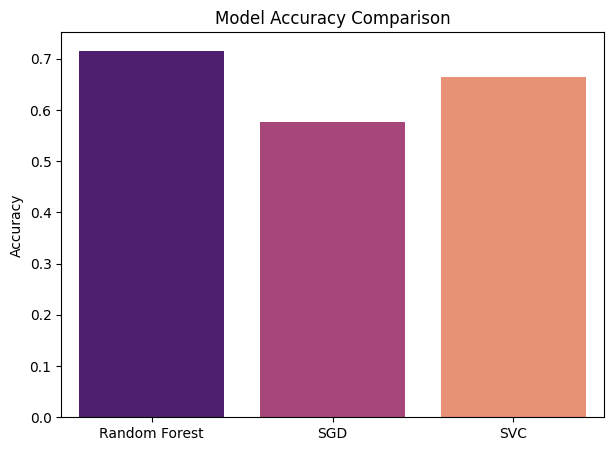

In [29]:
# MODEL COMPARISON
rf_acc = accuracy_score(y_test, rf_pred)
sgd_acc = accuracy_score(y_test, sgd_pred)
svc_acc = accuracy_score(y_test, svc_pred)

plt.figure(figsize=(7,5))
sns.barplot(
    x=["Random Forest", "SGD", "SVC"],
    y=[rf_acc, sgd_acc, svc_acc],
    palette="magma"
)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Chemical prediction

1) Top positive correlation with quality: alcohol (strong positive).
2) Top negative correlations with quality: volatile acidity (strong negative), density, chlorides.
3) Permutation importances (Random Forest): shows the same: alcohol highest, followed by sulphates, citric acid, while volatile acidity, density, and chlorides are important negatively.